**Question 1**

---



Suppose that a hospital has kept records for the age and BMI (Body Mass Index) for 16 randomly selected individuals, with the data presented as below. Calculate the correlation coefficient for the two above attributes. Are these two attributes positively or negatively correlated? 

| Age  | 23  | 23  | 27  | 27  | 39  | 41  | 47  | 49  | 52  | 54  | 54  | 56  | 57  | 58  | 58  | 60  |
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| BMI  | 16  | 19  | 18  | 21  | 24  | 23  | 26  | 25  | 24  | 26  | 23  | 26  | 27  | 31  | 26  | 27  |


In [ ]:
import pandas as pd

#initialize list of lists
data = [[23, 16], [23, 19], [27, 18], [27, 21], [39, 24], [41, 23 ], [47, 26], [49, 25],[52, 24], [54, 26], [54, 23], [56, 26], [57, 27], [58, 31 ], [58, 26], [60, 27]]

#create pandas Dataframe
df = pd.DataFrame(data, columns = ['Age', 'BMI'])
column_1 = df['Age']
column_2 = df['BMI']

#Find the correlation between Age and BMI using corr() function 
correlation = column_1.corr(column_2) 
display(correlation)


0.8911082029151666

**Question 2**


---


Load the CSV file BL_books.csv, which includes records of books hosted at the British Library. Inspect the data and describe any issues observed with the data. Remove fields that refer to internal processes at the British Library and do not describe the books themselves (Corporate Author, Corporate Contributors, Issuance type, Former owner, Shelfmarks, Engraver). Clean data in column Date of Publication, as to remove the extra dates in square brackets (e.g. 1879 [1878] -> 1879) and convert date ranges to their start date, wherever present (e.g. 1860-63 -> 1860). Provide the code for data cleaning and provide evidence that your data cleaning methods have worked (e.g. by displaying a portion of the cleaned dataset).


In [ ]:
import pandas as pd
data = pd.read_csv("BL-books.csv")
data1 = data.drop(columns=['Engraver', 'Corporate Author', 'Corporate Contributors', 'Former owner', 'Issuance type', 'Shelfmarks'
], axis=1)
#convert to string and use regex to remove dates in brackets 
data1['Date of Publication'] = data1['Date of Publication'].astype(str).str.replace(r"\[.*\]", "")
#convert date ranges to their start date using lambda function 
data1['Date of Publication'] = data1['Date of Publication'].apply (lambda x: x.split('-')[0])
display(data1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Flickr URL
0,206,NaN,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",http://www.flickr.com/photos/britishlibrary/ta...
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",http://www.flickr.com/photos/britishlibrary/ta...
...,...,...,...,...,...,...,...,...,...
8282,4158088,NaN,London,1838,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",http://www.flickr.com/photos/britishlibrary/ta...
8283,4158128,NaN,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",http://www.flickr.com/photos/britishlibrary/ta...
8284,4159563,NaN,London,,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",http://www.flickr.com/photos/britishlibrary/ta...
8285,4159587,NaN,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",http://www.flickr.com/photos/britishlibrary/ta...


**Question 3**


---


Load the CSV file country-income.csv which includes both numerical and categorical values. Perform data cleaning in order to replace any NaN values with the mean of the value for a given field. Then replace any categorical labels with numerical labels. Display the resulting dataset.


In [ ]:
import pandas as pd
data = pd.read_csv("country-income.csv")
mean = data['Income'].mean()
data['Income'].fillna(mean, inplace=True)
mapping_dict = {"Online Shopper" : {"Yes" : 1, "No" : 0}} 
data.replace(mapping_dict, inplace=True)
data.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.000000,0
1,Brazil,32.0,57600.000000,1
2,USA,35.0,64800.000000,0
3,Brazil,43.0,73200.000000,0
4,USA,45.0,76533.333333,1


**Question 4**

---


Load the CSV file shoesize.csv, which includes measurements of shoe size and height (in inches) for 408 subjects, both female and male. Plot the scatterplots of shoe size versus height for female and male subjects separately. Compute the Pearson's correlation coefficient of shoe size versus height for female and male subjects separately. What can be inferred by the scatterplots and computed correlation coefficients? You can implement your own formulation of the correlation coefficient or use the scipy.stats package to assist you.


*Scatterplot for males*

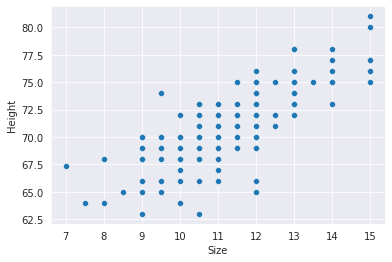

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style('darkgrid')

#‘usecols’ parameter to load specific columns into dataframe 
data = pd.read_csv('shoesize.csv', usecols=[1,2,3])
data1 = data[data['Gender'] == 'M'] 
sns.scatterplot(x='Size', y='Height', data=data1) 
plt.show()


*Scatterplot for females*

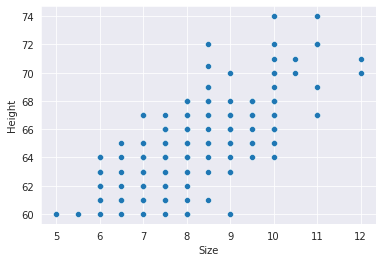

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style('darkgrid')
#‘usecols’ parameter to load specific columns into dataframe data = pd.read_csv('shoesize.csv', usecols=[1,2,3])
data1 = data[data['Gender'] == 'F'] 
sns.scatterplot(x='Size', y='Height', data=data1) 
plt.show() 


*Pearsons correlation coefficient for males*

In [ ]:
#‘usecols’ parameter to load specific columns into dataframe 
data = pd.read_csv('shoesize.csv', usecols=[1,2,3])
data1 = data[data['Gender'] == 'M'] 
display(data1.corr(method='pearson')) 


,Size,Height
Size,1.000000,0.767709
Height,0.767709,1.000000


*Pearsons correlation coefficient for females*

In [ ]:
#‘usecols’ parameter to load specific columns into dataframe 
data = pd.read_csv('shoesize.csv', usecols=[1,2,3])
data1 = data[data['Gender'] == 'F'] 
display(data1.corr(method='pearson')) 


,Size,Height
Size,1.000000,0.707812
Height,0.707812,1.000000


**Question 5**

---


Using the breast cancer dataset from section 1 of this notebook, perform Principal Component Analysis with 2 components. Compute the explained variance ratio for each component, and plot the scatterplot of all samples along the two principal components, color-coded according to the "Class" column (this column should not be used in the PCA analysis). Ensure that your data is normalized prior to performing PCA. What insights can you obtain by the explained variance ratio of each component, and by viewing the scatterplot of the principal components?


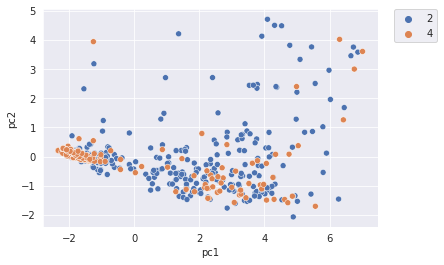

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
df.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion', 'Single Epithelial Cell Size ', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses','Class'] 
df = df.drop(['Sample code'],axis=1) 
#replace missing values with NaN
df = df.replace('?',np.NaN)
#Drop NaN 
df = df.dropna()

from sklearn.preprocessing import StandardScaler
features = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion', 'Single Epithelial Cell Size ', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
#Sort values by Class column
df_sorted = df.sort_values(by='Class', ascending=True)
target_sorted = df_sorted['Class'] #Seperating out the features
x = df.loc[:, features].values #Seperating out the Class 
y = df.loc[:,['Class']].values #Standardizing the features
x = StandardScaler().fit_transform(x) 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# this code reduces dimensionality of dataset to 2 dimensions using PCA. 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
df_projection = pd.DataFrame({'pc1': principalComponents[:, 0], 'pc2': principalComponents[:, 1], 'Class': target_sorted}) 
sns.scatterplot(x='pc1', y='pc2', hue='Class', palette="deep", data=df_projection)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
plt.show() 


From this scatterplot we can infer that values belong to Class 4 are easier to discriminate than values belong to Class 2. 
The explained variance shows how much information (variance) can be attributed to each of the principal components. By using: 


In [ ]:
from sklearn.decomposition import PCA 

pca.explained_variance_ratio_


array([0.65547574, 0.08623354])

This shows that the first principal component contains around 65.54% of the variance and the second principal component contains around 8.62% of the variance. Together, the two components contain around 74.16% of the information. 

**Question 6**

---


What kind of relationship can be inferred from summary statistics regarding ``ACT composite score`` and ``SAT total score``? Which visualisations make this relationship apparent?


The ‘ACT composite score’ and ‘SAT total score’ have a high positive linear correlation. 

In [ ]:
df = pd.read_csv('graduation_rate.csv', usecols=[0,1]) 
display(df.corr()) 

,ACT composite score,SAT total score
ACT composite score,1.000000,0.885884
SAT total score,0.885884,1.000000


The visualization that makes this relationship apparent is Scatterplot. 

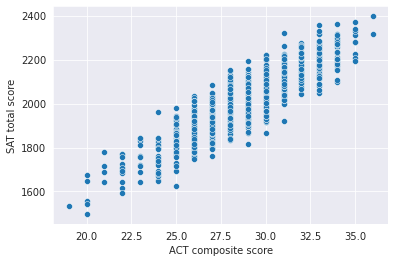

In [ ]:
sns.scatterplot(x='ACT composite score', y='SAT total score', data=df) 
plt.show() 

**Question 7**

---


Based on box plots what is the relationship between ``parental level of education`` and ``parental income``? Using table visualisation, find and show the entire rows that correspond to the outliers regarding ``parental income`` whose parents have a master's degree.

i) There is a progressive increase in the median values of parental income as the parental level of education becomes higher. Also, the same pattern is observed in the max values of the parental income except from the last one (master’s degree), which has a maximum value lower than bachelor’s degree.

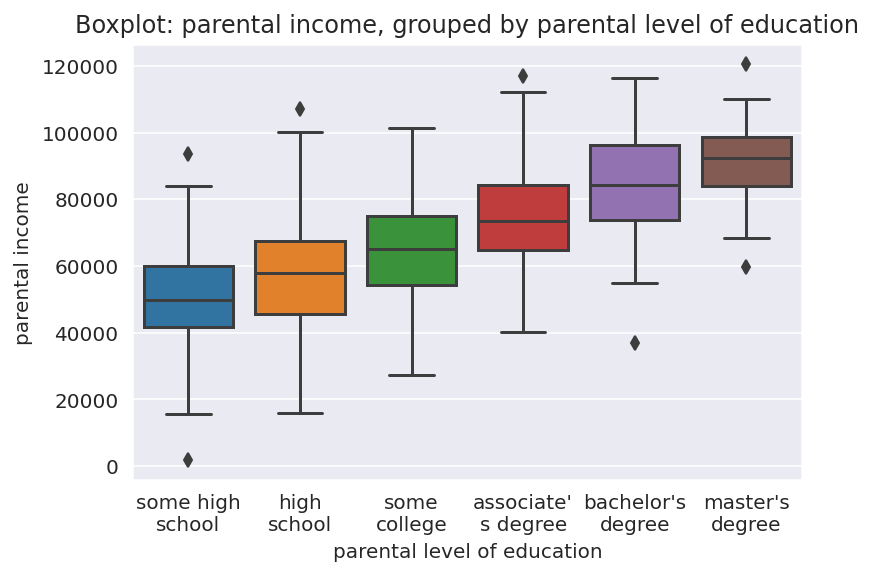

In [ ]:
%config InlineBackend.figure_formats = set(['retina'])

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

df = pd.read_csv('graduation_rate.csv')

education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

df['parental level of education'] = pd.Categorical(df['parental level of education'],
                                                   ordered=True,
                                                   categories=education_order)

ax = sns.boxplot(x='parental level of education', y='parental income', data=df)
plt.title('Boxplot: parental income, grouped by parental level of education') 

import textwrap
ax.set_xticklabels([textwrap.fill(t.get_text(), 10) for t in ax. get_xticklabels()]) 
plt.show() 


ii) Using the following code, I found the entire rows that correspond to the outliers regarding parental income whose parents have a master’s degree. 

In [ ]:
pd.set_option("display.max_rows", None) 
display(df[df["parental level of education"] == "master's degree" ].sort_values(by='parental income', ascending=False)) 


,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
411,31,2108,master's degree,120391,4.0,3.6,4
519,31,2121,master's degree,109948,4.0,3.5,7
378,30,2219,master's degree,109282,4.0,4.0,5
360,31,2156,master's degree,108696,4.0,3.4,5
449,28,1974,master's degree,108486,3.9,3.6,4
442,28,2097,master's degree,108158,3.8,3.4,4
647,33,2196,master's degree,107941,4.0,3.5,5
499,25,1818,master's degree,105455,3.4,3.3,4
620,33,2217,master's degree,104897,4.0,3.4,7
112,31,2100,master's degree,104132,4.0,3.6,4


**Question 8**

---


The function ``load_wine`` from ``sklearn.datasets`` can be used to load the *wine dataset* into a ``DataFrame`` by using the commands ``data = load_wine()``, ``df = pd.DataFrame(data.data, columns=data.feature_names)``, and ``df['target'] = pd.Series(data.target)``. 

  8.1. Load the wine dataset. Which feature is categorical? Compute the frequency of each value of the categorical feature.
    
  8.2. Compute univariate and multivariate summaries for all the numerical features. Group observations by the categorical feature and compute the corresponding **median** for each remaining numerical feature.
    
  8.3. Group observations by the categorical feature and create one box plot of ``alcohol`` for each group. 
    
  8.4. Create a scatter plot for the pair of **distinct** numerical features with the highest correlation.  
    
  8.5. Exclude the categorical feature, standardize the numerical features, and display a projection obtained by multidimensional scaling. Color the points by the categorical feature. 

8.1) The ‘Target’ feature is categorical. The code to compute the frequency of each value of the categorical feature is:

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.Series(data.target)
freq_target = df['Target'].value_counts()/len(df) 
display(freq_target)

1    0.398876
0    0.331461
2    0.269663
Name: Target, dtype: float64

8.2) By writing this line of code we can compute summary statistics for numerical features. 

In [ ]:
df.Target = df.Target.astype('category') 
display(df.describe()) 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


By typing this line of code, we can group observations by the categorical feature and compute the corresponding median for each remaining numerical feature. 

In [ ]:
display(df.groupby('Target').median()) 

8.3) By typing this line of code we create one box plot of alcohol for each categorical feature group.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


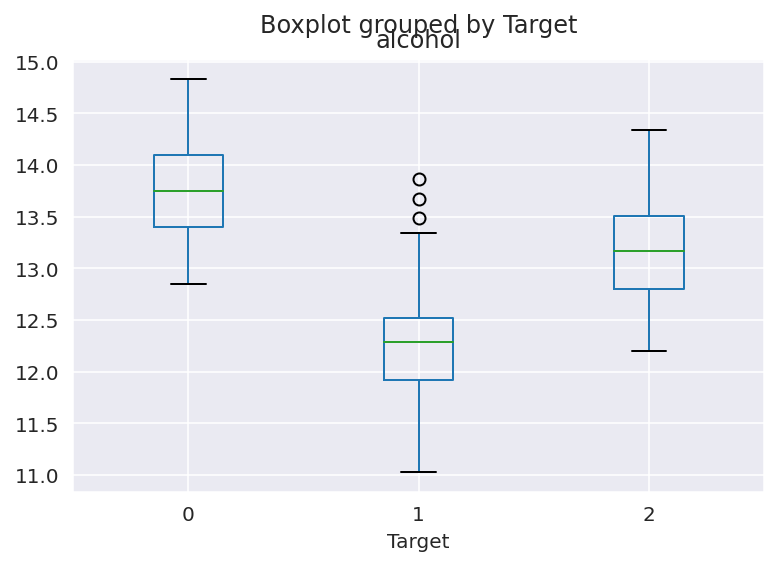

In [ ]:
boxplot = df.boxplot(column=['alcohol'], by='Target')

8.4) The correlation matrix can be computed with this function: 

In [ ]:
display(df.corr())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


From this matrix we can see the pair of plots with the highest correlation (total_phenols- flavanoids) and create a scatter plot for them:

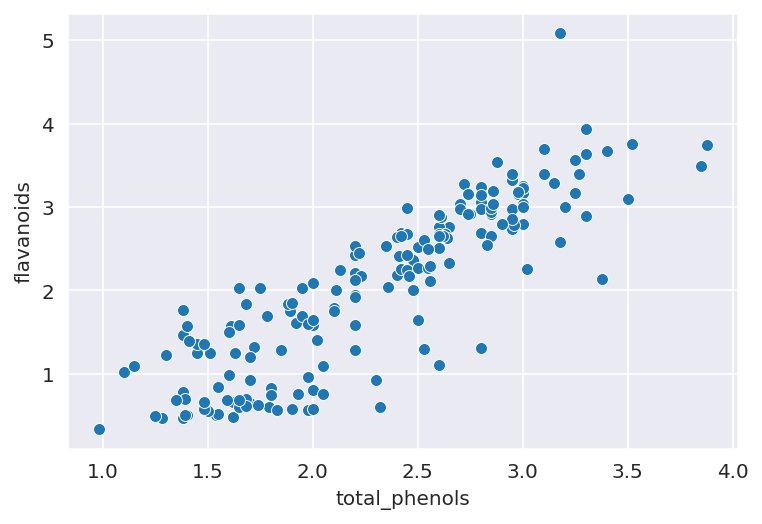

In [ ]:
sns.scatterplot(x='total_phenols', y='flavanoids', data=df)
plt.show()

8.5) i) By using this code we sort the observations by ‘target’, then exclude the categorical feature and standardize each of the numerical features individually: 

In [ ]:
from sklearn.preprocessing import StandardScaler 
df_sorted = df.sort_values(by='Target', ascending=True) 
target_sorted = df_sorted['Target'] 
X = df_sorted.drop(columns='Target').to_numpy() 
scaler = StandardScaler()
X = scaler.fit_transform(X) 


ii) By using this code we display a projection obtained by multidimensional scaling with the points colored by the categorical feature (target): 

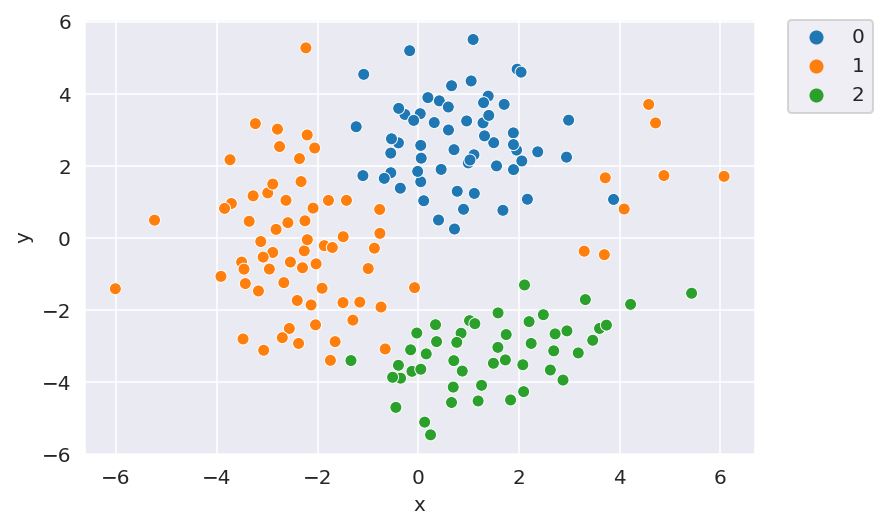

In [ ]:
from sklearn.manifold import MDS 

embedding = MDS(n_components=2)
Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],'target': target_sorted}) 
sns.scatterplot(x='x', y='y', hue='target', data=df_projection) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
plt.show() 
